**Our dataset has all flights departing from `New Delhi` airport and arriving at `Mumbai`. So we will try out our model's working for New Delhi to Mumbai flight prediction.**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
df = pd.read_csv('flight_prices_final.csv',index_col=None)
df

,Carrier,Depart,Arrive,Travel Date,Duration,Dep-Time,Arrive-Time,No. of Stops,Fare
0,Air Asia,New Delhi,Mumbai,"Sun, 10 Oct",5h 55m,16:15,22:10,1 Stop,"5,953"
1,Air Asia,New Delhi,Mumbai,"Sun, 10 Oct",6h 00m,05:20,11:20,1 Stop,"5,953"
2,Air Asia,New Delhi,Mumbai,"Sun, 10 Oct",6h 35m,09:25,16:00,1 Stop,"5,953"
3,Air Asia,New Delhi,Mumbai,"Sun, 10 Oct",11h 45m,18:35,06:20\n+ 1 day,1 Stop,"5,953"
4,Air Asia,New Delhi,Mumbai,"Sun, 10 Oct",14h 05m,16:15,06:20\n+ 1 day,1 Stop,"5,953"
...,...,...,...,...,...,...,...,...,...
2727,Go First,New Delhi,Mumbai,"Fri, 29 Oct",7h 30m,08:10,15:40,1 Stop,"12,519"
2728,Go First,New Delhi,Mumbai,"Fri, 29 Oct",9h 20m,08:10,17:30,1 Stop,"12,519"
2729,IndiGo,New Delhi,Mumbai,"Fri, 29 Oct",9h 10m,07:40,16:50,1 Stop,"12,780"
2730,Go First,New Delhi,Mumbai,"Fri, 29 Oct",6h 45m,12:35,19:20,1 Stop,"12,939"


### Descriptive Analysis

**We will use *temp_df* copy of original dataframe for *Descriptive Analysis*.**

In [5]:
temp_df = df.copy(deep=True)
temp_df.head(3)

,Carrier,Depart,Arrive,Travel Date,Duration,Dep-Time,Arrive-Time,No. of Stops,Fare
0,Air Asia,New Delhi,Mumbai,"Sun, 10 Oct",5h 55m,16:15,22:10,1 Stop,"5,953"
1,Air Asia,New Delhi,Mumbai,"Sun, 10 Oct",6h 00m,05:20,11:20,1 Stop,"5,953"
2,Air Asia,New Delhi,Mumbai,"Sun, 10 Oct",6h 35m,09:25,16:00,1 Stop,"5,953"


In [6]:
print("We have {} rows of data divided amongst {} features.".format(temp_df.shape[0],temp_df.shape[1]))

We have 2732 rows of data divided amongst 9 features.


In [7]:
duplicates = temp_df[temp_df.duplicated()]
duplicates.shape

(0, 9)

**We do not see any duplicate values present in our dataset.**

In [8]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Carrier       2732 non-null   object
 1   Depart        2732 non-null   object
 2   Arrive        2732 non-null   object
 3   Travel Date   2732 non-null   object
 4   Duration      2732 non-null   object
 5   Dep-Time      2732 non-null   object
 6   Arrive-Time   2732 non-null   object
 7   No. of Stops  2732 non-null   object
 8   Fare          2732 non-null   object
dtypes: object(9)
memory usage: 192.2+ KB


In [9]:
print("Our dataset have {} number of records divided among 8 independent features and 1 target feature.".format(temp_df.shape[0]))

Our dataset have 2732 number of records divided among 8 independent features and 1 target feature.


In [10]:
temp_df.isnull().sum()

Carrier         0
Depart          0
Arrive          0
Travel Date     0
Duration        0
Dep-Time        0
Arrive-Time     0
No. of Stops    0
Fare            0
dtype: int64

In [11]:
temp_df.isin(['--']).sum()

Carrier         0
Depart          0
Arrive          0
Travel Date     0
Duration        0
Dep-Time        0
Arrive-Time     0
No. of Stops    0
Fare            0
dtype: int64

In [12]:
temp_df.isin(['',' ']).sum()

Carrier         0
Depart          0
Arrive          0
Travel Date     0
Duration        0
Dep-Time        0
Arrive-Time     0
No. of Stops    0
Fare            0
dtype: int64

**We see that we donot have any kind of missing data**

In [13]:
temp_df.dtypes

Carrier         object
Depart          object
Arrive          object
Travel Date     object
Duration        object
Dep-Time        object
Arrive-Time     object
No. of Stops    object
Fare            object
dtype: object

In [14]:
temp_df.describe()

,Carrier,Depart,Arrive,Travel Date,Duration,Dep-Time,Arrive-Time,No. of Stops,Fare
count,2732,2732,2732,2732,2732,2732,2732,2732,2732
unique,6,1,1,19,166,120,142,4,302
top,Air India,New Delhi,Mumbai,"Wed, 20 Oct",2h 05m,08:10,23:00,1 Stop,"5,955"
freq,662,2732,2732,166,241,123,101,1852,766


**We need to convert *No.of Stops and Fare* to numerical datatypes.**

In [15]:
temp_df['Travel Date'].head(3)

0    Sun, 10 Oct
1    Sun, 10 Oct
2    Sun, 10 Oct
Name: Travel Date, dtype: object

In [16]:
temp_df.head(5)

,Carrier,Depart,Arrive,Travel Date,Duration,Dep-Time,Arrive-Time,No. of Stops,Fare
0,Air Asia,New Delhi,Mumbai,"Sun, 10 Oct",5h 55m,16:15,22:10,1 Stop,"5,953"
1,Air Asia,New Delhi,Mumbai,"Sun, 10 Oct",6h 00m,05:20,11:20,1 Stop,"5,953"
2,Air Asia,New Delhi,Mumbai,"Sun, 10 Oct",6h 35m,09:25,16:00,1 Stop,"5,953"
3,Air Asia,New Delhi,Mumbai,"Sun, 10 Oct",11h 45m,18:35,06:20\n+ 1 day,1 Stop,"5,953"
4,Air Asia,New Delhi,Mumbai,"Sun, 10 Oct",14h 05m,16:15,06:20\n+ 1 day,1 Stop,"5,953"


In [17]:
temp_df['Travel Date'] = pd.to_datetime(temp_df['Travel Date'],format='%a, %d %b')

In [18]:
temp_df['day_of_travel'] = temp_df['Travel Date'].dt.day_name()

In [19]:
temp_df.head(5)

,Carrier,Depart,Arrive,Travel Date,Duration,Dep-Time,Arrive-Time,No. of Stops,Fare,day_of_travel
0,Air Asia,New Delhi,Mumbai,1900-10-10,5h 55m,16:15,22:10,1 Stop,"5,953",Wednesday
1,Air Asia,New Delhi,Mumbai,1900-10-10,6h 00m,05:20,11:20,1 Stop,"5,953",Wednesday
2,Air Asia,New Delhi,Mumbai,1900-10-10,6h 35m,09:25,16:00,1 Stop,"5,953",Wednesday
3,Air Asia,New Delhi,Mumbai,1900-10-10,11h 45m,18:35,06:20\n+ 1 day,1 Stop,"5,953",Wednesday
4,Air Asia,New Delhi,Mumbai,1900-10-10,14h 05m,16:15,06:20\n+ 1 day,1 Stop,"5,953",Wednesday


In [20]:
temp_df['Travel Date'] = pd.to_datetime(temp_df['Travel Date'],format='%a, %d %b').dt.strftime('%d %b')

In [21]:
temp_df.head(5)

,Carrier,Depart,Arrive,Travel Date,Duration,Dep-Time,Arrive-Time,No. of Stops,Fare,day_of_travel
0,Air Asia,New Delhi,Mumbai,10 Oct,5h 55m,16:15,22:10,1 Stop,"5,953",Wednesday
1,Air Asia,New Delhi,Mumbai,10 Oct,6h 00m,05:20,11:20,1 Stop,"5,953",Wednesday
2,Air Asia,New Delhi,Mumbai,10 Oct,6h 35m,09:25,16:00,1 Stop,"5,953",Wednesday
3,Air Asia,New Delhi,Mumbai,10 Oct,11h 45m,18:35,06:20\n+ 1 day,1 Stop,"5,953",Wednesday
4,Air Asia,New Delhi,Mumbai,10 Oct,14h 05m,16:15,06:20\n+ 1 day,1 Stop,"5,953",Wednesday


In [22]:
temp_df['Travel Date'].dtypes

dtype('O')

## Exploratory data analysis

**We will use `temp_df` copy of original dataset for EDA.**

### Univariate Analysis

In [23]:
list_cols = temp_df.columns

In [24]:
list_cols[0]

'Carrier'

#### 1.'Carrier'

**`Carrier` feature provides us about list of flight service provider companies.**

In [25]:
temp_df['Carrier'].dtypes

dtype('O')

**The datatype of this column is `object` type. This feature is `categorical`.**

In [26]:
temp_df['Carrier'].value_counts()

Air India    662
IndiGo       605
Vistara      602
Go First     396
SpiceJet     276
Air Asia     191
Name: Carrier, dtype: int64

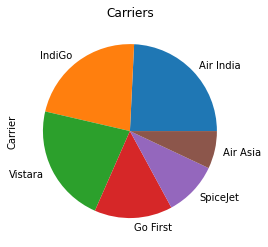

In [27]:
temp_df['Carrier'].value_counts().plot(kind='pie')
plt.title('Carriers')
plt.show()

**We observe that our dataset mostly have flight information of carriers `Air India`,`IndiGo`, and `Vistra`. We have very few data available for `Air Asia`.**

In [28]:
list_cols[1]

'Depart'

#### 2. 'Depart'

**`Depart` feature provides us information about the departure airport.**

In [29]:
temp_df['Depart'].dtypes

dtype('O')

**This feature is `object` type and it is a `categorical` feature.**

In [30]:
temp_df['Depart'].value_counts()

New Delhi    2732
Name: Depart, dtype: int64

In [31]:
list_cols[2]

'Arrive'

#### 3. 'Arrive'

**`Arrive` feature provides information about arrival airport for the flights.**

In [32]:
temp_df['Arrive'].dtypes

dtype('O')

**This feature is `categorical` with `object` datatype values.**

In [33]:
temp_df['Arrive'].value_counts()

Mumbai    2732
Name: Arrive, dtype: int64

**Our dataset has all flights departing from `New Delhi` airport and arriving at `Mumbai`. So we will try out our model's working for New Delhi to Mumbai flight prediction.**

# We will remove 'Depart' and 'Arrive' features during data pre-processing.

In [34]:
temp_df.head(5)

,Carrier,Depart,Arrive,Travel Date,Duration,Dep-Time,Arrive-Time,No. of Stops,Fare,day_of_travel
0,Air Asia,New Delhi,Mumbai,10 Oct,5h 55m,16:15,22:10,1 Stop,"5,953",Wednesday
1,Air Asia,New Delhi,Mumbai,10 Oct,6h 00m,05:20,11:20,1 Stop,"5,953",Wednesday
2,Air Asia,New Delhi,Mumbai,10 Oct,6h 35m,09:25,16:00,1 Stop,"5,953",Wednesday
3,Air Asia,New Delhi,Mumbai,10 Oct,11h 45m,18:35,06:20\n+ 1 day,1 Stop,"5,953",Wednesday
4,Air Asia,New Delhi,Mumbai,10 Oct,14h 05m,16:15,06:20\n+ 1 day,1 Stop,"5,953",Wednesday


In [35]:
temp_df.drop(['Depart','Arrive'],axis='columns',inplace=True)

In [36]:
temp_df.head(4)

,Carrier,Travel Date,Duration,Dep-Time,Arrive-Time,No. of Stops,Fare,day_of_travel
0,Air Asia,10 Oct,5h 55m,16:15,22:10,1 Stop,"5,953",Wednesday
1,Air Asia,10 Oct,6h 00m,05:20,11:20,1 Stop,"5,953",Wednesday
2,Air Asia,10 Oct,6h 35m,09:25,16:00,1 Stop,"5,953",Wednesday
3,Air Asia,10 Oct,11h 45m,18:35,06:20\n+ 1 day,1 Stop,"5,953",Wednesday


In [37]:
list_cols[3]

'Travel Date'

#### 4. 'Travel Date'

**`Travel Date` feature provides the date of travelling.**

In [38]:
temp_df['Travel Date'].dtypes

dtype('O')

**This is a `object` type feature.**

In [39]:
temp_df['Travel Date'].unique()

array(['10 Oct', '11 Oct', '12 Oct', '13 Oct', '14 Oct', '15 Oct',
       '16 Oct', '17 Oct', '19 Oct', '20 Oct', '21 Oct', '22 Oct',
       '23 Oct', '24 Oct', '25 Oct', '26 Oct', '27 Oct', '28 Oct',
       '29 Oct'], dtype=object)

**In our dataset, we have flight details for flights flew between `10-oct-2021 till 29-oct-2021`.**

In [40]:
list_cols[4]

'Duration'

#### 5.'Duration'

**`Duration` feature provides us information about the time duration for the particular journey.**

In [41]:
temp_df['Duration'].dtypes

dtype('O')

**Data in this feature is of `object` datatype.**

In [42]:
temp_df['Duration'].head(3)

0    5h 55m
1    6h 00m
2    6h 35m
Name: Duration, dtype: object

**for better analysis and interpretations, we will split the data values and make them `numerical` type.**

In [43]:
temp_df['Duration_in_hours'] = ''
for i in range(temp_df.shape[0]):
    temp_df['Duration_in_hours'][i] = temp_df['Duration'][i].split('h')[0]

In [44]:
temp_df.head(7)

,Carrier,Travel Date,Duration,Dep-Time,Arrive-Time,No. of Stops,Fare,day_of_travel,Duration_in_hours
0,Air Asia,10 Oct,5h 55m,16:15,22:10,1 Stop,"5,953",Wednesday,5
1,Air Asia,10 Oct,6h 00m,05:20,11:20,1 Stop,"5,953",Wednesday,6
2,Air Asia,10 Oct,6h 35m,09:25,16:00,1 Stop,"5,953",Wednesday,6
3,Air Asia,10 Oct,11h 45m,18:35,06:20\n+ 1 day,1 Stop,"5,953",Wednesday,11
4,Air Asia,10 Oct,14h 05m,16:15,06:20\n+ 1 day,1 Stop,"5,953",Wednesday,14
5,Air Asia,10 Oct,14h 10m,08:00,22:10,1 Stop,"5,953",Wednesday,14
6,Go First,10 Oct,2h 05m,09:30,11:35,Non Stop,"5,954",Wednesday,2


**Now we can drop the original column `Duration` as we have extracted the hours for travelling from it and added it as new column `Duration_in_hours`.**

In [45]:
temp_df.drop('Duration',axis='columns',inplace=True)

In [46]:
temp_df.head(7)

,Carrier,Travel Date,Dep-Time,Arrive-Time,No. of Stops,Fare,day_of_travel,Duration_in_hours
0,Air Asia,10 Oct,16:15,22:10,1 Stop,"5,953",Wednesday,5
1,Air Asia,10 Oct,05:20,11:20,1 Stop,"5,953",Wednesday,6
2,Air Asia,10 Oct,09:25,16:00,1 Stop,"5,953",Wednesday,6
3,Air Asia,10 Oct,18:35,06:20\n+ 1 day,1 Stop,"5,953",Wednesday,11
4,Air Asia,10 Oct,16:15,06:20\n+ 1 day,1 Stop,"5,953",Wednesday,14
5,Air Asia,10 Oct,08:00,22:10,1 Stop,"5,953",Wednesday,14
6,Go First,10 Oct,09:30,11:35,Non Stop,"5,954",Wednesday,2


In [47]:
temp_df['Duration_in_hours'].dtypes

dtype('O')

**We will convert the `Duration_in_hours` into `numerical` type.**

In [48]:
temp_df['Duration_in_hours'] = pd.to_numeric(temp_df['Duration_in_hours'])

In [49]:
temp_df['Duration_in_hours'].dtypes

dtype('int64')

**We have successfully converted the datatype of `Duration_in_hours` feature to `int64`.**

In [50]:
list_cols[5]

'Dep-Time'

#### 6. 'Dep-Time'

**`Dep-Time` feature provides us information about the departure times of the flights.**

In [51]:
temp_df['Dep-Time'].dtypes

dtype('O')

**This feature is present as `object` datatype.**

In [52]:
temp_df['Dep-Time'].value_counts()

08:10    123
17:45    100
08:00     87
16:35     68
08:55     64
        ... 
12:15      1
10:35      1
15:00      1
08:30      1
05:35      1
Name: Dep-Time, Length: 120, dtype: int64

**We will extract `Departure_hours` from `Depart-Time` feature and add it as a new column.**

In [53]:
temp_df['Depart_hours'] = ''
for i in range(temp_df.shape[0]):
    temp_df['Depart_hours'][i] = temp_df['Dep-Time'][i].split(':')[0]

In [54]:
temp_df.head(5)

,Carrier,Travel Date,Dep-Time,Arrive-Time,No. of Stops,Fare,day_of_travel,Duration_in_hours,Depart_hours
0,Air Asia,10 Oct,16:15,22:10,1 Stop,"5,953",Wednesday,5,16
1,Air Asia,10 Oct,05:20,11:20,1 Stop,"5,953",Wednesday,6,05
2,Air Asia,10 Oct,09:25,16:00,1 Stop,"5,953",Wednesday,6,09
3,Air Asia,10 Oct,18:35,06:20\n+ 1 day,1 Stop,"5,953",Wednesday,11,18
4,Air Asia,10 Oct,16:15,06:20\n+ 1 day,1 Stop,"5,953",Wednesday,14,16


**Now we can drop the `Dep-Time` feature.**

In [55]:
temp_df.drop('Dep-Time',axis='columns',inplace=True)

In [56]:
temp_df.head(5)

,Carrier,Travel Date,Arrive-Time,No. of Stops,Fare,day_of_travel,Duration_in_hours,Depart_hours
0,Air Asia,10 Oct,22:10,1 Stop,"5,953",Wednesday,5,16
1,Air Asia,10 Oct,11:20,1 Stop,"5,953",Wednesday,6,05
2,Air Asia,10 Oct,16:00,1 Stop,"5,953",Wednesday,6,09
3,Air Asia,10 Oct,06:20\n+ 1 day,1 Stop,"5,953",Wednesday,11,18
4,Air Asia,10 Oct,06:20\n+ 1 day,1 Stop,"5,953",Wednesday,14,16


In [57]:
temp_df['Depart_hours'].dtypes

dtype('O')

**We will convert `Depart_hours` from `object` type to `numerical` type for better handling.**

In [58]:
temp_df['Depart_hours'] = pd.to_numeric(temp_df['Depart_hours'])

In [59]:
temp_df['Depart_hours'].dtypes

dtype('int64')

**We have successfully converted the datatype of `Depart_hours` feature to `int64`.**

In [60]:
list_cols[6]

'Arrive-Time'

#### 7.'Arrive-Time'

**`Arrive-Time` feature provides us the information about the arrival time of the flights.**

In [61]:
temp_df['Arrive-Time'].dtypes

dtype('O')

**This feature data is in `object` datatype.**

In [62]:
temp_df['Arrive-Time'].value_counts()

23:00             101
10:40\n+ 1 day     88
18:15              73
09:40\n+ 1 day     72
22:35              71
                 ... 
10:45               1
09:25               1
15:20               1
11:50\n+ 1 day      1
19:45               1
Name: Arrive-Time, Length: 142, dtype: int64

**We will extract the `Arrival hour` from the `Arrive-Time` feature.**

In [63]:
temp_df['Arrive_hours'] = ''
for i in range(temp_df.shape[0]):
    temp_df['Arrive_hours'][i] = temp_df['Arrive-Time'][i].split(':')[0]

In [64]:
temp_df.head(5)

,Carrier,Travel Date,Arrive-Time,No. of Stops,Fare,day_of_travel,Duration_in_hours,Depart_hours,Arrive_hours
0,Air Asia,10 Oct,22:10,1 Stop,"5,953",Wednesday,5,16,22
1,Air Asia,10 Oct,11:20,1 Stop,"5,953",Wednesday,6,5,11
2,Air Asia,10 Oct,16:00,1 Stop,"5,953",Wednesday,6,9,16
3,Air Asia,10 Oct,06:20\n+ 1 day,1 Stop,"5,953",Wednesday,11,18,06
4,Air Asia,10 Oct,06:20\n+ 1 day,1 Stop,"5,953",Wednesday,14,16,06


**Now we can drop the `Arrive-Time` feature.**

In [65]:
temp_df.drop('Arrive-Time',axis='columns',inplace=True)

In [66]:
temp_df.head(3)

,Carrier,Travel Date,No. of Stops,Fare,day_of_travel,Duration_in_hours,Depart_hours,Arrive_hours
0,Air Asia,10 Oct,1 Stop,"5,953",Wednesday,5,16,22
1,Air Asia,10 Oct,1 Stop,"5,953",Wednesday,6,5,11
2,Air Asia,10 Oct,1 Stop,"5,953",Wednesday,6,9,16


In [67]:
temp_df['Arrive_hours'].dtypes

dtype('O')

**We will convert the `Arrive_hours` datatype from `object` type to `numerical` type.**

In [68]:
temp_df['Arrive_hours'] = pd.to_numeric(temp_df['Arrive_hours'])

In [69]:
temp_df['Arrive_hours'].dtypes

dtype('int64')

**We have successfully converted the datatype of `Arrive_hours` feature to `int64`.**

In [70]:
list_cols[7]

'No. of Stops'

#### 8. 'No. of Stops'

**`No. of Stops` feature gives us information about the number of stops.**

In [71]:
temp_df['No. of Stops'].dtypes

dtype('O')

**This feature is `object` datatype.**

In [72]:
temp_df['No. of Stops'].value_counts()

1 Stop       1852
Non Stop      801
2 Stop(s)      71
3 Stop(s)       8
Name: No. of Stops, dtype: int64

**We will try to make this feature `numerical` type. We will convert :**
    
    `1. 1 Stop ==> 1`
    
    `2. Non Stop ==> 0`
    
    `3. 2 Stop(s) ==> 2`
    
    `4. 3 Stop(s) ==> 3`

In [73]:
stop_values = temp_df['No. of Stops'].unique()

In [74]:
print([i for i in stop_values])

['1 Stop', 'Non Stop', '2 Stop(s)', '3 Stop(s)']


In [75]:
temp_df['stops'] = ''
for i in range(temp_df.shape[0]):
    if temp_df['No. of Stops'][i] == stop_values[0]:
        temp_df['stops'][i] = 1
    elif temp_df['No. of Stops'][i] == stop_values[2]:
        temp_df['stops'][i] = 2
    elif temp_df['No. of Stops'][i] == stop_values[3]:
        temp_df['stops'][i] = 3
    elif temp_df['No. of Stops'][i] == stop_values[1]:
        temp_df['stops'][i] = 0

In [76]:
temp_df.head(5)

,Carrier,Travel Date,No. of Stops,Fare,day_of_travel,Duration_in_hours,Depart_hours,Arrive_hours,stops
0,Air Asia,10 Oct,1 Stop,"5,953",Wednesday,5,16,22,1
1,Air Asia,10 Oct,1 Stop,"5,953",Wednesday,6,5,11,1
2,Air Asia,10 Oct,1 Stop,"5,953",Wednesday,6,9,16,1
3,Air Asia,10 Oct,1 Stop,"5,953",Wednesday,11,18,6,1
4,Air Asia,10 Oct,1 Stop,"5,953",Wednesday,14,16,6,1


In [77]:
temp_df['stops'].value_counts()

1    1852
0     801
2      71
3       8
Name: stops, dtype: int64

**As we have extracted the data from `No. of Stops` feature and added it as `numerical type` feature `stops`.So we can remove the original `No. of Stops` column.**

In [78]:
temp_df.drop('No. of Stops',axis='columns',inplace=True)

In [79]:
temp_df.head(5)

,Carrier,Travel Date,Fare,day_of_travel,Duration_in_hours,Depart_hours,Arrive_hours,stops
0,Air Asia,10 Oct,"5,953",Wednesday,5,16,22,1
1,Air Asia,10 Oct,"5,953",Wednesday,6,5,11,1
2,Air Asia,10 Oct,"5,953",Wednesday,6,9,16,1
3,Air Asia,10 Oct,"5,953",Wednesday,11,18,6,1
4,Air Asia,10 Oct,"5,953",Wednesday,14,16,6,1


In [80]:
list_cols[8]

'Fare'

#### 9. Fare

**`Fare` feature provides us the information about the travel fare.**

In [81]:
temp_df['Fare'].dtypes

dtype('O')

**We see that `Fare` feature is in `object` datatype, so we will convert it to `numeric` datatype for better analysis.**

In [82]:
temp_df['Fare'].value_counts()

5,955     766
5,954     220
9,840     169
5,953     130
8,895      56
         ... 
21,601      1
9,358       1
9,893       1
11,248      1
13,291      1
Name: Fare, Length: 302, dtype: int64

**To convert these values into numeric format, we will first try to remove the `commas` present with the Fare values.**

In [83]:
for i in range(temp_df.shape[0]):
    temp_df['Fare'][i] = temp_df['Fare'][i].replace(',','')

In [84]:
temp_df['Fare'].value_counts()

5955     766
5954     220
9840     169
5953     130
8895      56
        ... 
21601      1
9358       1
9893       1
11248      1
13291      1
Name: Fare, Length: 302, dtype: int64

In [85]:
temp_df['Fare'] = pd.to_numeric(temp_df['Fare'])

In [86]:
temp_df['Fare'].dtypes

dtype('int64')

In [87]:
temp_df['Fare'].describe()

count     2732.000000
mean      8291.143119
std       3125.710527
min       4931.000000
25%       5955.000000
50%       6585.000000
75%       9840.000000
max      31337.000000
Name: Fare, dtype: float64

**We observe that the available values for `minimum fare` is $4931$ and for `maximum fare` is $31337$.**

In [88]:
binwidth = int((max(temp_df['Fare'])-min(temp_df['Fare']))/4)

In [89]:
binwidth

6601

**We will create 3 bins**

In [90]:
bins = range(min(temp_df['Fare']),max(temp_df['Fare']),binwidth)

In [91]:
bins

range(4931, 31337, 6601)

In [92]:
group_names = ['low','Medium','High','Very high']

In [93]:
pd.cut(temp_df['Fare'],bins)

0        (4931, 11532]
1        (4931, 11532]
2        (4931, 11532]
3        (4931, 11532]
4        (4931, 11532]
             ...      
2727    (11532, 18133]
2728    (11532, 18133]
2729    (11532, 18133]
2730    (11532, 18133]
2731    (11532, 18133]
Name: Fare, Length: 2732, dtype: category
Categories (4, interval[int64, right]): [(4931, 11532] < (11532, 18133] < (18133, 24734] < (24734, 31335]]

In [94]:
df_fare_binned = pd.cut(temp_df['Fare'],bins,labels=group_names)

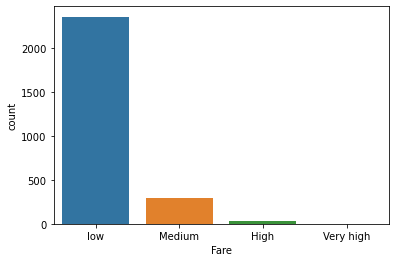

In [95]:
sn.countplot(df_fare_binned)
plt.show()

**We have successfully converted the datatype of `Fare` feature to `int64` type.**

In [96]:
temp_df

,Carrier,Travel Date,Fare,day_of_travel,Duration_in_hours,Depart_hours,Arrive_hours,stops
0,Air Asia,10 Oct,5953,Wednesday,5,16,22,1
1,Air Asia,10 Oct,5953,Wednesday,6,5,11,1
2,Air Asia,10 Oct,5953,Wednesday,6,9,16,1
3,Air Asia,10 Oct,5953,Wednesday,11,18,6,1
4,Air Asia,10 Oct,5953,Wednesday,14,16,6,1
...,...,...,...,...,...,...,...,...
2727,Go First,29 Oct,12519,Monday,7,8,15,1
2728,Go First,29 Oct,12519,Monday,9,8,17,1
2729,IndiGo,29 Oct,12780,Monday,9,7,16,1
2730,Go First,29 Oct,12939,Monday,6,12,19,1


### Bivariate Analysis

In [97]:
list_cols[0]

'Carrier'

In [98]:
#bv1 -- bivariate1
df_bv1 = temp_df[['Carrier','Fare']]

In [108]:
df_grp = df_bv1.groupby('Carrier').mean()

,Fare
Carrier,
Air Asia,6355.471204
Air India,9107.722054
Go First,8584.866162
IndiGo,7062.218182
SpiceJet,7592.724638
Vistara,9369.360465


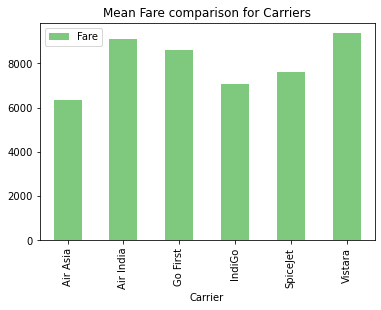

In [125]:
df_grp.plot(kind='bar',title='Mean Fare comparison for Carriers',cmap='Accent')
plt.show()

**We observe that `Air India`,`Vistara` and `GoFirst` carriers are having `high` Fare prices.**

In [128]:
from scipy import stats

In [ ]:
anova_results_1 = stats.f_oneway(df_grp.get_group('Air Asia'))

## Data Pre-processing

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
x = temp_df.drop('Fare',axis='columns')
y = temp_df['Fare']

In [131]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=42)    

In [132]:
x_test.shape

(902, 7)

In [134]:
y_test.shape

(902,)

In [135]:
numerical_cols = []
for col in x_train.columns:
    if x_train[col].dtypes != 'object':
        numerical_cols.append(col)
print("Numerical columns: {}".format(numerical_cols))

Numerical columns: ['Duration_in_hours', 'Depart_hours', 'Arrive_hours']


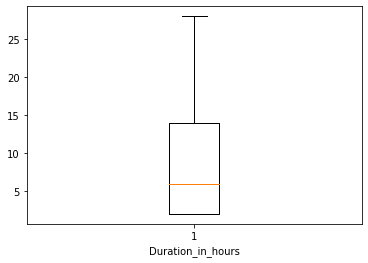

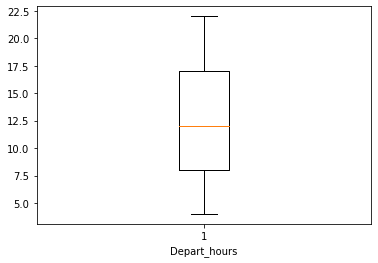

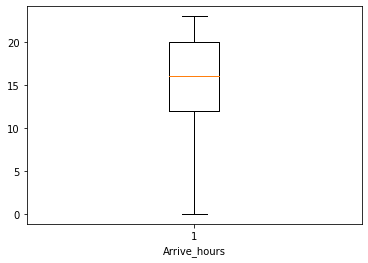

In [136]:
for col in numerical_cols:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.boxplot(x_train[col])
    ax.set_xlabel(col)
    plt.show()

**We observe no extreme values present in the numerical features of the dataset.**

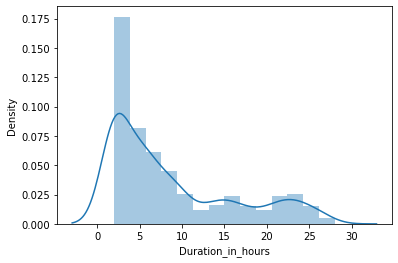

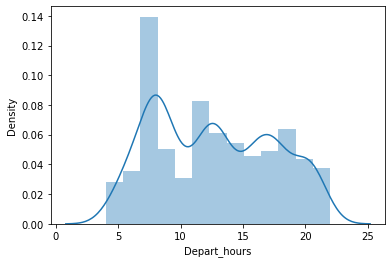

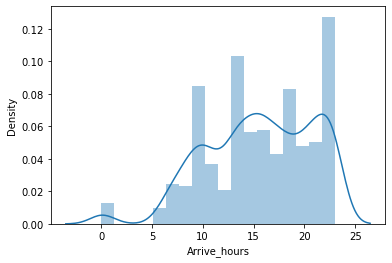

In [141]:
for col in numerical_cols:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax = sn.distplot((x_train[col]))
    ax.set_xlabel(col)
    plt.show()

In [142]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [143]:
cat_cols = []
for col in x_train.columns:
    if x_train[col].dtypes == 'object':
        cat_cols.append(col)
cat_cols

['Carrier', 'Travel Date', 'day_of_travel', 'stops']

In [144]:
for col in cat_cols:
    x_train[col] = le.fit_transform(x_train[col].astype(str))
x_train

,Carrier,Travel Date,day_of_travel,Duration_in_hours,Depart_hours,Arrive_hours,stops
2675,3,18,1,2,12,14,0
1213,5,8,0,20,17,13,1
1029,5,7,6,2,12,14,0
836,0,6,5,11,18,6,1
1289,4,9,2,2,10,12,0
...,...,...,...,...,...,...,...
1638,3,11,1,5,13,19,1
1095,5,7,6,26,11,13,1
1130,2,8,0,2,15,17,0
1294,5,9,2,2,21,23,0


In [145]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

In [146]:
for col in x_train.columns:
    x_train[col] = s.fit_transform(x_train[col].values.reshape(-1,1))

### Modelling

In [147]:
# for linear regression
from sklearn.linear_model import LinearRegression
# for metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [148]:
from sklearn.model_selection import cross_val_score

#### cross validation scores for linear regressor

In [149]:
lr= LinearRegression()
lr_cv = cross_val_score(lr, x_train, y_train, cv=10)

print('\n The absolute mean score we got from 10-Fold CV:',np.mean(lr_cv))


 The absolute mean score we got from 10-Fold CV: 0.2775523397394267


#### cross validation score for Decision Tree regressor

In [151]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

dtr = DecisionTreeRegressor()

dtr_cv = cross_val_score(dtr,x_train,y_train,cv=10)

print('\n The absolute mean score we got from 10-Fold CV:',np.mean(dtr_cv))


 The absolute mean score we got from 10-Fold CV: 0.3890480788244316


#### cross validation score for Random Forest Regressor

In [152]:
from sklearn.ensemble import RandomForestRegressor

rfr_cross_val=[]
rfr_n_estimators=[]

for i in range(10,50):
    rfr=RandomForestRegressor(n_estimators=i)
    rfr_n_estimators.append(i)
    rfr_cross_val.append(cross_val_score(rfr,x_train,y_train,cv=10).mean())
    
rf_cv=pd.DataFrame({})
rf_cv["RF CV Score"]=rfr_cross_val
rf_cv['n estimator']=rfr_n_estimators

rf_cv.max()

RF CV Score     0.622176
n estimator    49.000000
dtype: float64

In [153]:
results1=[]
results1.clear()
results1.append(lr_cv)
results1.append(dtr_cv)
results1.append(rf_cv['RF CV Score'])

names1=[]
names1.clear()
names1.append("Linear Regression")
names1.append("Decision Tree Regressor")
names1.append("Random Forest Regressor")

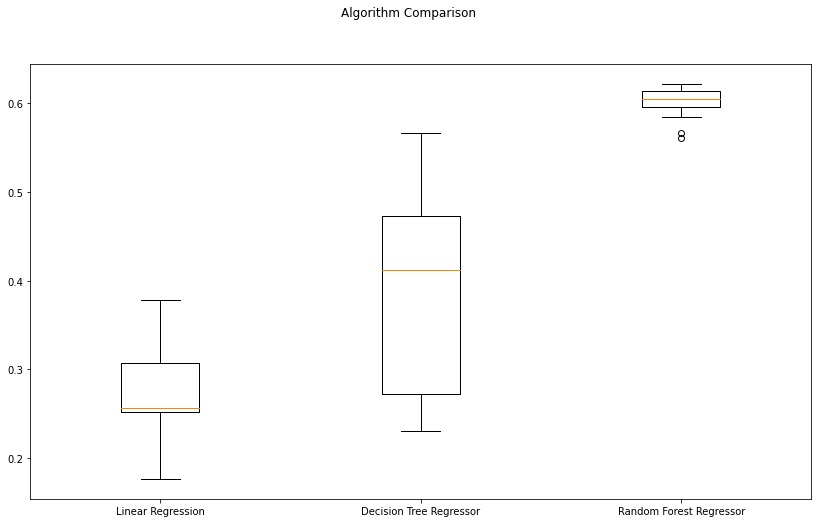

In [154]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
fig.suptitle('Algorithm Comparison')
plt.boxplot(results1)
ax.set_xticklabels(names1)
plt.show()

**We will go ahead with Random Forest Regressor.**

In [155]:
from sklearn.model_selection import GridSearchCV

model=RandomForestRegressor()

param={'n_estimators':[10,50,100]}

grid=GridSearchCV(estimator=model,param_grid=param)

grid.fit(x_train,y_train)

print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

0.5986675305318363
100
{'n_estimators': 100}


### Testing

In [156]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(x_train,y_train)

RandomForestRegressor()